<a href="https://colab.research.google.com/github/DyanHarden/Praktikum-Data-Mining/blob/main/2209116022_Praktikum_Datmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Data Skor Benchmark Pada GPU (Graphic Processing Unit) Komputer Sebagai Bahan Acuan User Dalam Memilih GPU Yang Sesuai Kebutuhan.**






### IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **BUSSINES UNDERSTANDING**






- Bussines Objective

Tujuan bisnis dari dataset ini adalah untuk menganalisis faktor-faktor yang memengaruhi keputusan pengguna dalam membeli VGA Card untuk komputer Mereka. Hal ini bertujuan untuk memberikan pemahaman yang lebih baik kepada produsen dan penjual GPU tentang preferensi pengguna serta meningkatkan keputusan pembelian yang efisien.
Selain itu, tujuan bisnisnya adalah untuk mempromosikan dan mendorong penggunaan GPU dalam komputasi, sehingga meningkatkan kesadaran dalam adopsi teknologi GPU di berbagai bidang seperti gaming, desain grafis, dan kecerdasan buatan.

- Assess Situation

Situasi bisnis yang mendasari analisis ini adalah meningkatnya permintaan akan GPU untuk keperluan komputasi yang semakin kompleks. Di Sisi Lain, Terdapat berbagai pilihan GPU dengan beragam spesifikasi dan harga, namun pengguna sering kali menghadapi kesulitan dalam memilih GPU yang sesuai dengan preferensi kebutuhan dan anggaran mereka.

- Data Mining Goals

Tujuan dari Data Mining pada dataset ini adalah untuk memprediksi preferensi pengguna terhadap GPU berdasarkan skor test benchmark dan fitur-fitur pendukung lainnya. Selain itu, adalah untuk menganalisis faktor-faktor yang memengaruhi keputusan pembelian pengguna, seperti harga, performa, efisiensi daya, dan kebutuhan spesifik. Melalui analisis data, diharapkan dapat meningkatkan pemahaman tentang preferensi dan kebutuhan pengguna dalam memilih GPU untuk komputer maupun AIO PC mereka.

- Project Plan

Rencana proyek untuk menganalisis dataset ini dimulai dengan pengumpulan data skor benchmark GPU dari berbagai sumber Data, kemudian akan dijelaskan karakteristiknya dan pola-pola yang menarik akan diidentifikasi, seperti tren performa GPU dari waktu ke waktu atau perbandingan antara harga dan performa gpu berdasarkan benchmark. Selanjutnya. Kualitas data akan dinilai dan masalah data akan diidentifikasi agar dapat diatasi dalam tahapan berikutnya, seperti penanganan data yang hilang atau outlier. Langkah-langkah ini penting untuk menjamin keberhasilan dari analisis data dan akurasi prediksi preferensi pengguna terhadap GPU.

# **DATA UNDERSTANDING**

## **Collect Initial Data**

Data tentang hasil skor benchmark GPU yang saya dapatkan bersumber dari dataset dari website Kaggle dengan judul "GPU Benchmarks Compilation".
Berikut Linkya datasetnya:
https://www.kaggle.com/datasets/alanjo/gpu-benchmarks/data

In [3]:
df = pd.read_csv('GPU_benchmarks_v7.csv')
df.head(20)

,gpuName,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category
0,GeForce RTX 3090 Ti,29094,1117,2099.99,13.85,450.0,64.650000,2022,Unknown
1,GeForce RTX 3080 Ti,26887,1031,1199.99,22.41,350.0,76.820000,2021,Desktop
2,GeForce RTX 3090,26395,999,1749.99,15.08,350.0,75.410000,2020,Desktop
3,Radeon RX 6900 XT,25458,1102,1120.31,22.72,300.0,84.860000,2020,Desktop
4,GeForce RTX 3080,24853,1003,999.00,24.88,320.0,77.660000,2020,Desktop
5,GeForce RTX 3070 Ti,23367,1003,749.99,31.16,290.0,80.580000,2021,Desktop
6,Radeon RX 6800 XT,23364,1078,859.00,27.20,300.0,77.880000,2020,Desktop
7,RTX A5000,22867,984,2631.20,8.69,230.0,99.420000,2021,Workstation
8,RTX A6000,22122,832,4999.99,4.42,300.0,73.740000,2021,Workstation
9,GeForce RTX 3070,22093,969,719.99,30.69,220.0,100.420000,2020,Desktop


## **Describe Data**

### Informasi Dasar

In [ ]:
print("Jumlah baris pada Dataset:", df.shape[0])
print("Jumlah kolom pada Dataset:", df.shape[1])

Jumlah baris pada Dataset: 2317
Jumlah kolom pada Dataset: 9


Penjelasan Dasar Dataset:

1. gpuName: Kolom ini berisi nama model GPU.

2. G3Dmark: Kolom ini menyimpan nilai G3Dmark, yang merupakan skor benchmark untuk kinerja rendering 3D dari GPU. Semakin tinggi nilai G3Dmark, semakin baik kinerja rendering 3D GPU tersebut.

3. G2Dmark: Kolom ini menyimpan nilai G2Dmark, yang merupakan skor benchmark untuk kinerja rendering 2D dari GPU. Semakin tinggi nilai G2Dmark, semakin baik kinerja rendering 2D GPU tersebut.

4. price: Kolom ini berisi harga GPU dalam mata uang tertentu.

5. gpuValue: Kolom ini mewakili nilai GPU, dihitung sebagai rasio antara skor G3Dmark dan harga. Semakin tinggi nilai gpuValue, semakin baik nilai performa GPU relatif terhadap harganya.

6. TDP: Kolom ini berisi nilai TDP (Thermal Design Power) dari GPU, yang mengindikasikan jumlah daya yang diharapkan dikonsumsi oleh GPU saat beroperasi secara normal. Semakin rendah nilai TDP, semakin efisien GPU dalam mengonsumsi daya.

7. powerPerformance: Kolom ini mewakili kinerja daya GPU, dihitung sebagai rasio antara skor G3Dmark dan TDP. Semakin tinggi nilai powerPerformance, semakin baik kinerja daya GPU relatif terhadap konsumsi daya yang diharapkan.

8. testDate: Kolom ini menyimpan tahun pengujian GPU.

9. category: Kolom ini berisi kategori GPU, misalnya Desktop, Mobile, dan Lain-lain.


### Informasi Lanjutan

In [ ]:
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           2317 non-null   object 
 1   G3Dmark           2317 non-null   int64  
 2   G2Dmark           2317 non-null   int64  
 3   price             553 non-null    float64
 4   gpuValue          553 non-null    float64
 5   TDP               692 non-null    float64
 6   powerPerformance  692 non-null    float64
 7   testDate          2317 non-null   int64  
 8   category          2317 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 163.0+ KB


**Penjelasan Lanjutan**:

1. RangeIndex: Indeks dari dataset ini memiliki rentang dari 0 hingga 2316, yang menunjukkan jumlah total baris atau entri dalam dataset.

2. Data columns (total 9 columns): Ada total 9 kolom dalam dataset.

3. Non-Null Count: Menunjukkan jumlah nilai non-null (tidak kosong) dalam setiap kolom.
  - gpuName, G3Dmark, G2Dmark, dan testDate memiliki 2317 nilai non-null, artinya tidak ada nilai yang hilang dalam kolom-kolom tersebut.
  - Kolom lainnya memiliki jumlah nilai non-null yang lebih kecil, yang menunjukkan bahwa ada nilai yang hilang dalam kolom-kolom tersebut. Jumlah non-null count dalam kolom price, gpuValue, TDP, dan powerPerformance adalah 553 dan 692.

4. Dtype: Menunjukkan tipe data dari setiap kolom.
  - object: Kolom-kolom dengan tipe data object umumnya berisi teks atau string.
  - int64: Kolom-kolom dengan tipe data int64 adalah kolom numerik yang berisi bilangan bulat.
  - float64: Kolom-kolom dengan tipe data float64 adalah kolom numerik yang berisi bilangan pecahan

### Informasi Statistik Deskriftip

In [ ]:
deskripsi_statistik = df.describe()
deskripsi_statistik

,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate
count,2317.000000,2317.000000,553.00000,553.000000,692.000000,692.000000,2317.000000
mean,2046.512732,352.051791,439.74660,10.405515,98.968064,34.103634,2013.956841
std,3758.139908,226.631283,763.59252,10.879097,82.878671,36.604351,3.911129
min,1.000000,7.000000,17.50000,0.000000,4.400000,0.630000,2009.000000
25%,130.000000,171.000000,109.99000,1.690000,35.000000,7.592500,2010.000000
50%,649.000000,307.000000,209.00000,6.580000,75.000000,20.825000,2013.000000
75%,1953.000000,494.000000,435.00000,16.430000,147.000000,49.120000,2017.000000
max,29094.000000,1117.000000,8999.00000,69.730000,500.000000,204.000000,2022.000000


**Penjelasan Deskriftip Statistik**:

1. Count: Menunjukkan jumlah nilai non-null (tidak kosong) dalam setiap kolom. Jumlahnya bervariasi untuk setiap kolom karena beberapa kolom memiliki nilai yang hilang (missing values).

2. Mean: Rata-rata dari nilai dalam setiap kolom. Ini memberikan gambaran tentang nilai rata-rata dari data dalam kolom tersebut.

3. Std: Standar deviasi dari nilai dalam setiap kolom. Ini mengukur seberapa tersebar data di sekitar rata-rata. Semakin tinggi nilai standar deviasi, semakin besar variasi atau dispersi data.

4. Min: Nilai terkecil dalam setiap kolom.

5. 25%: Kuartil pertama (Q1). Nilai ini menunjukkan batas bawah dari kuartil bawah (25%) dari data.

6. 50%: Median atau kuartil kedua (Q2). Nilai ini adalah nilai tengah dari data, yang membagi data menjadi dua bagian yang sama besar.

7. 75%: Kuartil ketiga (Q3). Nilai ini menunjukkan batas atas dari kuartil atas (75%) dari data.

8. Max: Nilai terbesar dalam setiap kolom.



## **Exploratory Data Analysis**

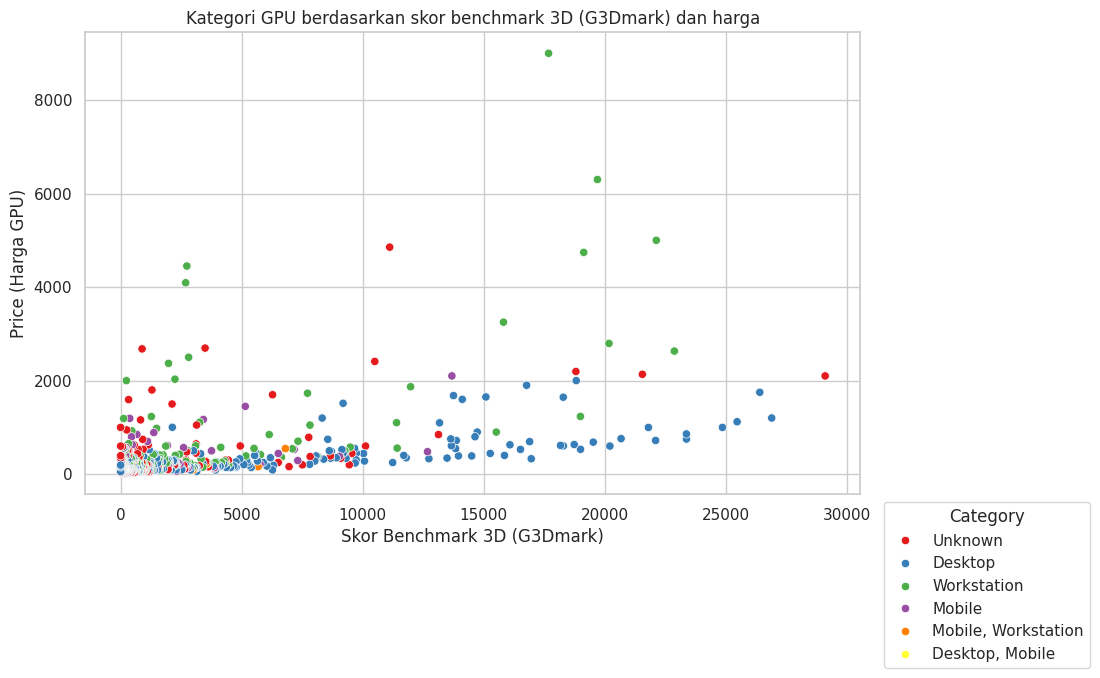

In [59]:
filtered_df = df.dropna(subset=['G3Dmark', 'price'])


plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='G3Dmark', y='price', hue='category', palette='Set1')
plt.title('Kategori GPU berdasarkan skor benchmark 3D (G3Dmark) dan harga')
plt.xlabel('Skor Benchmark 3D (G3Dmark)')
plt.ylabel('Price (Harga GPU)')
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1.02, 0))
plt.grid(True)
plt.show()

**PENJELASAN**:

Scatter plot yang dihasilkan menunjukkan hubungan antara skor benchmark 3D (G3Dmark) dan harga GPU untuk setiap kategori. Ini memungkinkan pengguna melihat sebaran data GPU berdasarkan skor 3D dan harga, serta kategori GPU yang sesuai kebutuhan.

1. Korelasi
*   Skor Benchmark 3D (G3Dmark): Sebagai pengukuran kinerja GPU dalam rendering grafis 3D, skor benchmark 3D menjadi parameter penting bagi pengguna yang mempertimbangkan kinerja grafis dari GPU yang akan dibeli. Semakin tinggi skor benchmark 3D, semakin baik kinerja grafis yang dihasilkan.
*   Harga GPU (Price): Scatter plot menunjukkan korelasi antara harga dan skor benchmark 3D, yang mana sebaran harga GPU berdasarkan skor 3Dnya. Ini membantu pengguna membandingkan nilai kinerja (skor 3D) dengan harga GPU yang akan mereka bayar.

2. Solutif
* Kesimpulannya, jika user atau konsumen ingin mendapatkan GPU dengan kinerja tinggi dengan harga terbaik, maka GPU dengan kategori Desktop merupakan pilihan yang cocok dan *Sweet Spot*, karena GPU Desktop memiliki kinerja tinggi dengan harga tidak setinggi beberapa GPU kategori Workstation yang juga memiliki kinerja tinggi.

<br>
Note: Kategori "Uknown" Merupakan GPU yang tidak dijual belikan secara umum oleh brand karena bisa berupa GPU prototype atapun hanya digunakan instansi dan kepentingan tertentu saja, namun data benchmarknya tersedia walaupun beberapa data lainnya tidak ada.






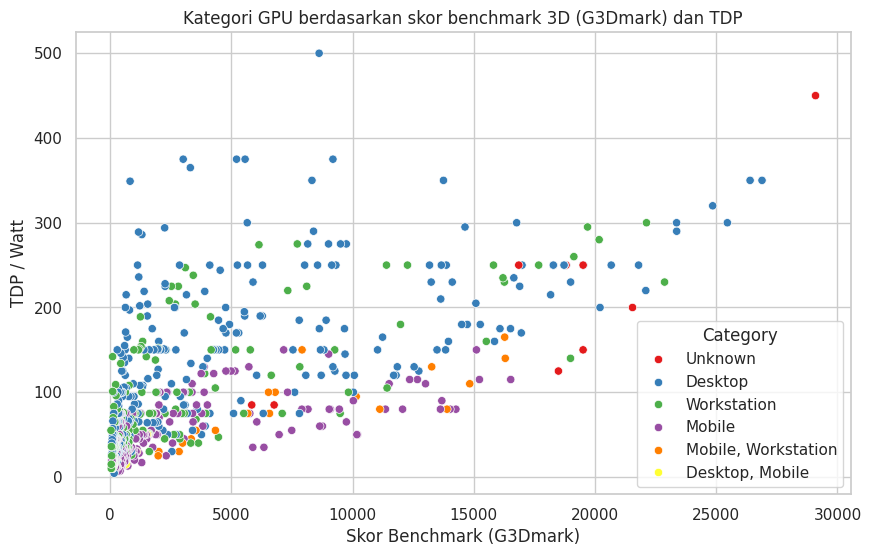

In [55]:
filtered_df = df.dropna(subset=['G3Dmark', 'TDP'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='G3Dmark', y='TDP', hue='category', palette='Set1')
plt.title('Kategori GPU berdasarkan skor benchmark 3D (G3Dmark) dan TDP')
plt.xlabel('Skor Benchmark (G3Dmark)')
plt.ylabel('TDP / Watt')
plt.legend(title='Category', loc='lower right')
plt.grid(True)
plt.show()

**PENJELASAN**:

Scatter plot yang dihasilkan menunjukkan hubungan antara skor benchmark 3D (G3Dmark) dan konsumsi daya termal (TDP) untuk setiap kategori GPU. Plot scatter ini membantu pengguna memahami hubungan antara kinerja grafis (skor 3D) dan TDP dari GPU yang dapat dipertimbangkan user dalam efisiensi dan penggunaan daya listrik GPU dalam kondisi ***full load*** atau dalam keadaan aktif.

1. Korelasi
* Skor Benchmark 3D (G3Dmark): Skor benchmark 3D menunjukkan seberapa baik kinerja grafis yang dihasilkan oleh GPU. Skor yang lebih tinggi menunjukkan seberapa baik kinerja grafis yang dihasilkan oleh GPU.
* TDP (Thermal Design Power): TDP adalah ukuran daya maksimum yang diperlukan oleh GPU dalam kondisi operasi normal. Scatter plot menunjukkan korelasi antara TDP dan skor benchmark 3D, di mana pengguna dapat melihat sebaran data GPU berdasarkan kinerja grafis (skor 3D) dan konsumsi daya (TDP).

2. Solutif
* Kesimpulannya, Jika pengguna menginginkan GPU dengan efisiensi daya terbaik dengan kinerja yang baik pula, maka tidak disarankan menggunakan GPU untuk PC seperti Desktop dan Workstation dikarenakan kategori gpu tersebut memiliki TDP yang cukup tinggi. Maka, Penggunaan GPU dengan kategori Mobile dan Mobile Workstationlah pilihan yang cocok bagi pengguna yang memerlukan GPU dengan efisiensi daya yang tinggi. Namun Perlu diingat bahwa GPU kategori Mobile ini biasanya diciptakan untuk ***All in One PC*** seperti Notebook dan Laptop, jadi tidak dapat dibeli terpisah seperti GPU Desktop dan harga jualnya juga lebih tinggi.

<br>
Note: Kategori "Uknown" Merupakan GPU yang tidak dijual belikan secara umum oleh brand karena bisa berupa GPU prototype atapun hanya digunakan instansi dan kepentingan tertentu saja, namun data benchmarknya tersedia walaupun beberapa data lainnya tidak ada.


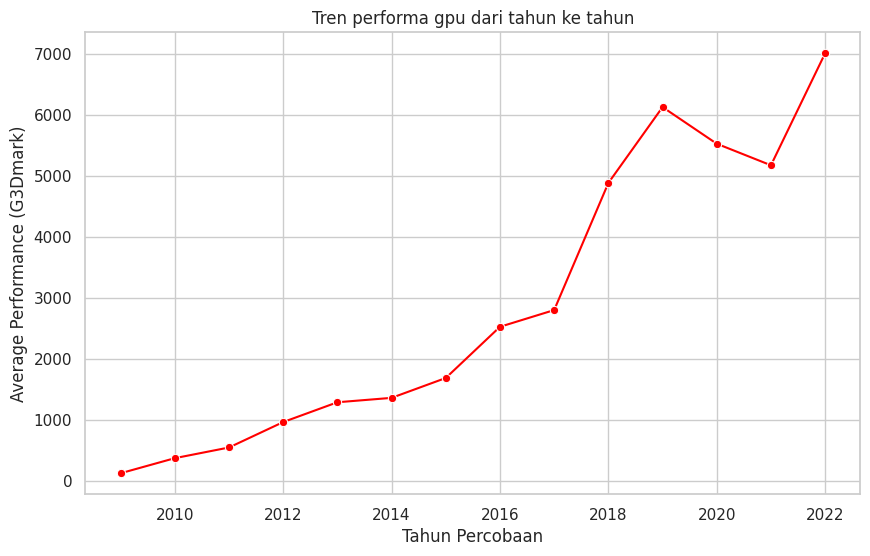

In [61]:
avg_performance_by_year = df.groupby('testDate')['G3Dmark'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_performance_by_year, x='testDate', y='G3Dmark', marker='o', color='red')
plt.title('Tren performa gpu dari tahun ke tahun')
plt.xlabel('Tahun Percobaan')
plt.ylabel('Average Performance (G3Dmark)')
plt.grid(True)
plt.show()

**PENJELASAN**:

Visualisasi yang dihasilkan adalah sebuah line plot yang menunjukkan tren performa rata-rata GPU dari tahun ke tahun, berdasarkan skor benchmark 3D (G3Dmark). Grafik ini membantu pengguna melihat bagaimana performa rata-rata GPU berubah seiring berjalannya waktu, yang dapat menjadi acuan untuk melihat tren perkembangan teknologi GPU dari tahun ke tahun.

1. Korelasi
* Tahun Percobaan (testDate): Tahun percobaan merupakan tahun di mana GPU diuji benchmark. Dengan menggunakan kolom ini sebagai sumbu x dalam line plot, pengguna dapat melihat bagaimana performa rata-rata GPU berubah dari tahun ke tahunnya.

* Skor Benchmark 3D (G3Dmark): Skor benchmark 3D (G3Dmark) digunakan sebagai metrik untuk mengukur performa GPU. Dengan menggunakan kolom ini sebagai sumbu y dalam line plot, pengguna dapat melihat bagaimana tren performa rata-rata GPU berubah dari tahun ke tahunnya.

2. Solutif
* Kesimpulannya, Ada baiknya user membeli GPU berdasarkan rekomendasi data tahun test benchmark diatas yaitu 2018-2022 karena tren performa gpu ditahun tersebut mengalami kenaikan yang signifikan tiap tahunnya.
* Karena biasanya sebelum GPU dijual belikan secara umum, Pabrikan GPU tersebut menguji coba berbagai aspek dari GPU yang akan mereka launching. Karena ditahun tersebut juga perkembangan aspek teknologi GPU sudah lebih baik dari tahun-tahun sebelumnya dan tren performa GPU ditahun tersebut naik signifikan, hal tersebut juga dapat membantu user dalam memilih GPU sesuai referensi pribadi.


## **Verify Data Quality**

### Missing Values

In [63]:
missing_values = df.isnull().sum()

print("Jumlah nilai yang kosong pada tiap kolom:")
print(missing_values)

Jumlah nilai yang kosong pada tiap kolom:
gpuName                0
G3Dmark                0
G2Dmark                0
price               1764
gpuValue            1764
TDP                 1625
powerPerformance    1625
testDate               0
category               0
dtype: int64


**PENJELASAN**:

Output tersebut memberikan informasi tentang jumlah nilai kosong (missing value) pada tiap kolom dalam dataset. berikut detailnya:

- gpuName: Tidak ada nilai kosong pada kolom ini, karena jumlah nilai kosongnya adalah 0.
- G3Dmark: Tidak ada nilai kosong pada kolom ini, karena jumlah nilai kosongnya adalah 0.
- G2Dmark: Tidak ada nilai kosong pada kolom ini, karena jumlah nilai kosongnya adalah 0.
- price: Ada 1764 nilai kosong pada kolom ini. Hal ini menunjukkan bahwa sebagian besar data dalam kolom harga (price) tidak tersedia.
- gpuValue: Ada 1764 nilai kosong pada kolom ini. Hal ini menunjukkan bahwa sebagian besar data dalam kolom nilai GPU (gpuValue) tidak tersedia.
- TDP: Ada 1625 nilai kosong pada kolom ini. Hal ini menunjukkan bahwa sebagian besar data dalam kolom TDP tidak tersedia.
- powerPerformance: Ada 1625 nilai kosong pada kolom ini. Hal ini menunjukkan bahwa sebagian besar data dalam kolom kinerja daya (powerPerformance) tidak tersedia.
- testDate: Tidak ada nilai kosong pada kolom ini, karena jumlah nilai kosongnya adalah 0.
- category: Tidak ada nilai kosong pada kolom ini, karena jumlah nilai kosongnya adalah 0.

Pada kolom price, gpuValue, TDP, dan powerPerformance banyak memiliki missing value karena data pada kolom "**category**" dengan nilai "**Unknown**" tidak memiliki data pada 4 kolom tersebut.

**Note**: Kategori "Uknown" Merupakan GPU yang tidak dijual belikan secara umum oleh brand karena bisa berupa GPU prototype atapun hanya digunakan instansi dan kepentingan tertentu saja, namun data benchmarknya tersedia walaupun beberapa data lainnya tidak ada.



## Outliers Value

In [43]:
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        outliers = detect_outliers_iqr(df[column])
        if outliers.any():
            print("Kolom {} memiliki outliers.".format(column))
            print("Indeks outliers:", df.index[outliers].tolist())
            print()

Kolom G3Dmark memiliki outliers.
Indeks outliers: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,

**PENJELASAN**:

- Kolom G3Dmark memiliki outliers: Hal ini menunjukkan bahwa kolom G3Dmark memiliki nilai-nilai yang jauh dari nilai-nilai lainnya dalam kolom tersebut. Indeks baris dari outliers tersebut ditampilkan dalam daftar.

- Kolom G2Dmark memiliki outliers: Hal ini menunjukkan bahwa kolom G2Dmark juga memiliki nilai-nilai yang jauh dari nilai-nilai lainnya dalam kolom tersebut. Indeks baris dari outliers tersebut ditampilkan dalam daftar.

### Duplicated Values

In [42]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2312    False
2313    False
2314    False
2315    False
2316    False
Length: 2317, dtype: bool

**PENJELASAN**:

Output diatas adalah nilai yang menunjukkan apakah setiap baris dalam dataset merupakan duplikat atau tidak. Jika nilai False, itu berarti baris tersebut tidak duplikat, sedangkan jika nilai True, itu berarti baris tersebut adalah duplikat.

Kesimpulannya, output tersebut menunjukkan bahwa tidak ada duplikat yang ditemukan di dalam dataset. Setiap baris unik dan tidak memiliki duplikat berdasarkan nilai-nilai yang ada pada setiap kolomnya.